In [25]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [26]:
data=pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")

In [27]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [28]:
data.describe

<bound method NDFrame.describe of    Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q

In [29]:
data.index

RangeIndex(start=0, stop=42, step=1)

In [30]:

data.shape

(42, 2)

In [31]:
data.set_index('Quarter', inplace=True)
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


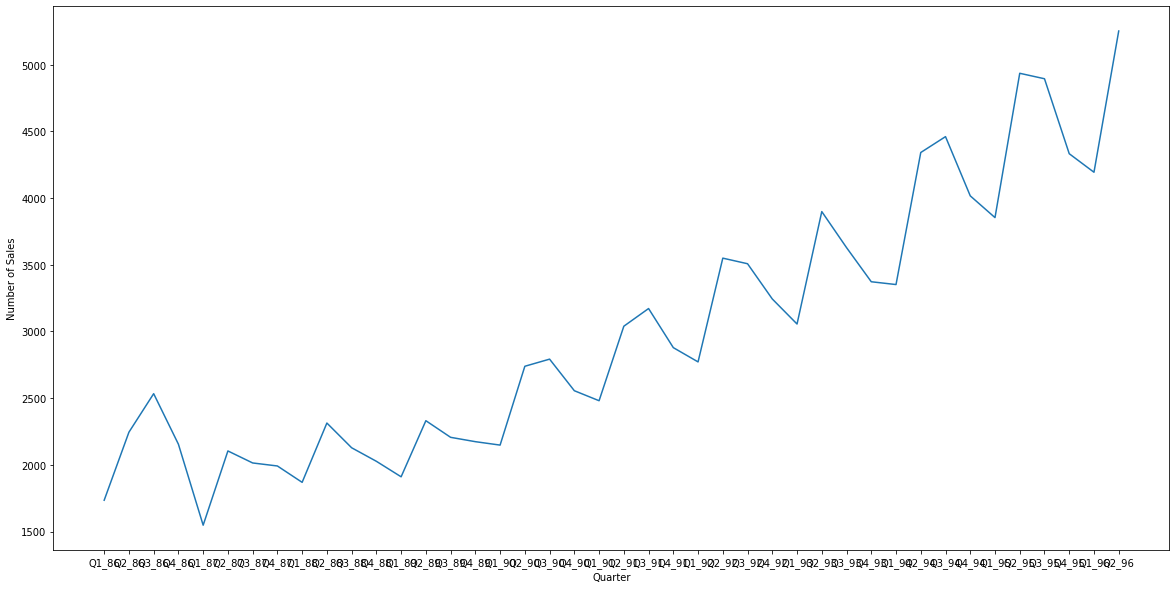

In [34]:
plt.figure(figsize=(20,10))
plt.xlabel("Quarter")
plt.ylabel("Number of Sales")
plt.plot(data)

In [35]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

               Sales
Quarter             
Q1_86            NaN
Q2_86            NaN
Q3_86            NaN
Q4_86            NaN
Q1_87            NaN
Q2_87            NaN
Q3_87            NaN
Q4_87            NaN
Q1_88            NaN
Q2_88            NaN
Q3_88            NaN
Q4_88    2055.393998
Q1_89    2070.042081
Q2_89    2077.225747
Q3_89    2049.954497
              Sales
Quarter            
Q1_86           NaN
Q2_86           NaN
Q3_86           NaN
Q4_86           NaN
Q1_87           NaN
Q2_87           NaN
Q3_87           NaN
Q4_87           NaN
Q1_88           NaN
Q2_88           NaN
Q3_88           NaN
Q4_88    261.256519
Q1_89    246.139429
Q2_89    252.874401
Q3_89    213.783151


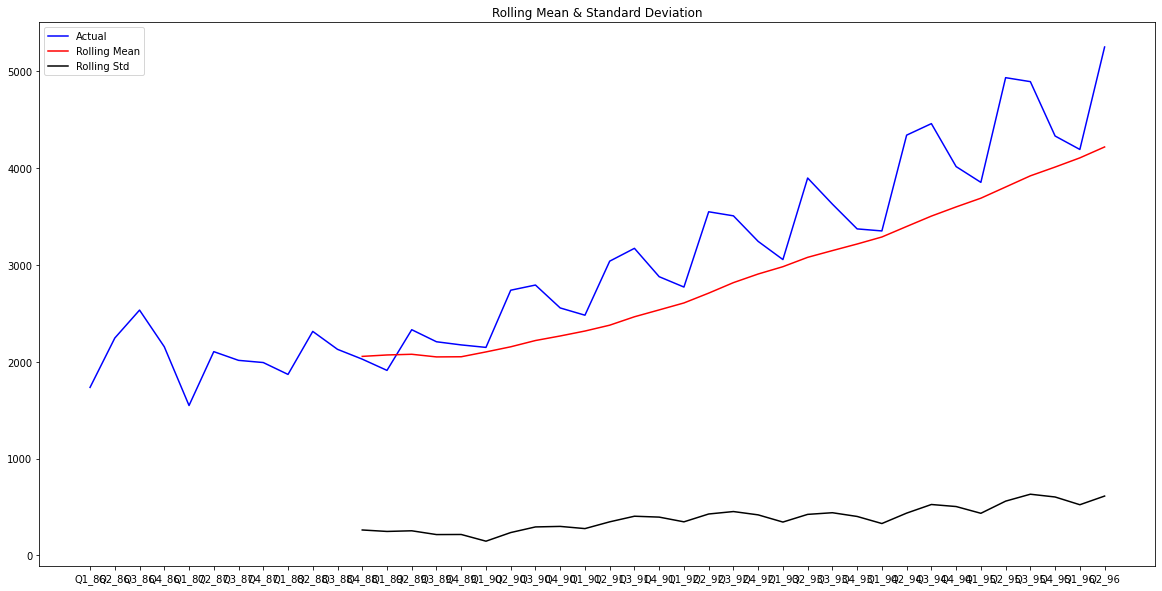

In [36]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='blue', label='Actual')
mean_6=plt.plot(rolmean, color='red', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

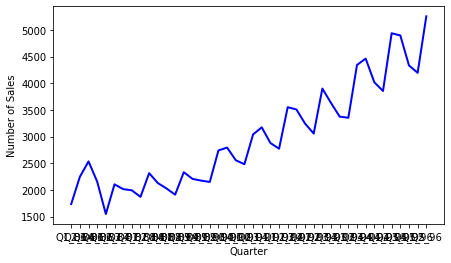

In [40]:
# Lineplot 
plt.figure(figsize=(7,4))
plt.xlabel("Quarter")
plt.ylabel("Number of Sales")
Ax = plt.axes()
Ax.set_facecolor("white")
plt.plot(data['Sales'], color = 'blue', linewidth=2)

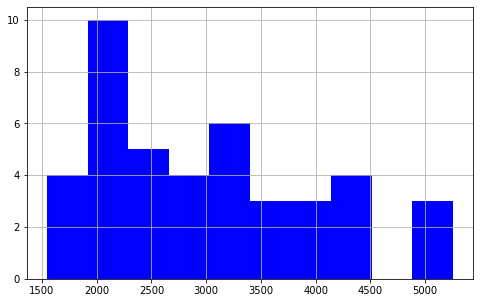

In [41]:
# Histogram
ax = plt.axes()
ax.set_facecolor("white")
data['Sales'].hist(figsize=(8,5), color = 'blue')

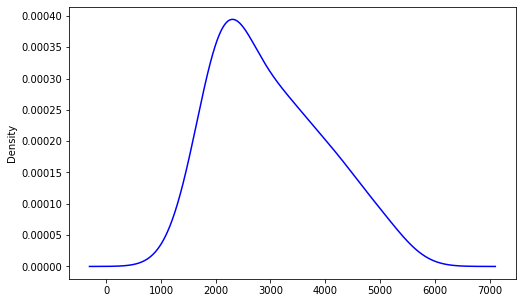

In [42]:
# Density Plot
ax = plt.axes()
ax.set_facecolor("white")
data['Sales'].plot(kind = 'kde', figsize=(8,5), color = 'blue')

**acf and pcf**

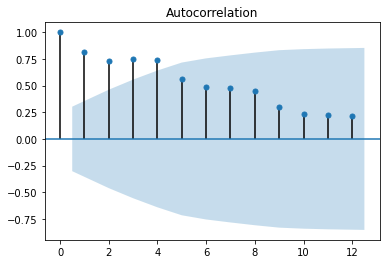

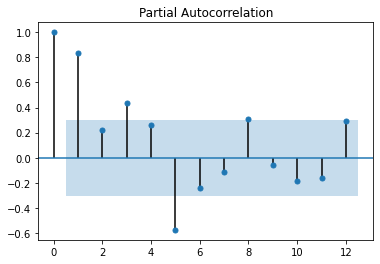

In [43]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
ax = plt.axes()
ax.set_facecolor("white")
tsa_plots.plot_pacf(data.Sales,lags=12)
ax = plt.axes()
ax.set_facecolor("white")
plt.show()

In [44]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

**Splitting data**

In [45]:
Train = data.head(84)
Test = data.tail(12)

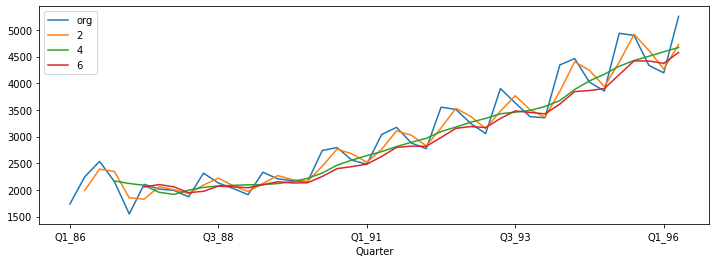

In [47]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,8,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [48]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Sales, pred_ses)
rmse_ses_model

539.7960358965822

In [52]:
#Holt method
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Sales, pred_hw)
rmse_hw_model

449.57882328201794

In [54]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

173.67048853645724

In [55]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

115.92135479296064

**Data preprocessing**

In [56]:
data1 = data.copy()
data1.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [63]:
data1["t"] = np.arange(0,42)
data1["t_squared"] = data1["t"]*data1["t"]

data1["log_Sales"] = np.log(data1["Sales"])

data1.head()

,Sales,t,t_squared,log_Sales
Quarter,,,,
Q1_86,1734.827000,0,0,7.458663
Q2_86,2244.960999,1,1,7.716443
Q3_86,2533.804993,2,4,7.837477
Q4_86,2154.962997,3,9,7.675529
Q1_87,1547.818996,4,16,7.344602


**Splitting data**

In [64]:
Train = data1.head(84)
Test = data1.tail(12)

In [65]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

449.7996226122965

In [66]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

417.56082837499247

**ARIMA model**

In [67]:
series = data.copy()
series 

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [68]:
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 30, Validation 12


In [69]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.715)
train, test = X[0:train_size], X[train_size:]

In [70]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
RMSE: 453.343


In [72]:
rmse_Persistence_model = 453.343

In [73]:
series = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True)
series

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


**grid search ARIMA parameters for a time series**

In [74]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [75]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
  
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.715)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [76]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [77]:
# load dataset
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=955.598
ARIMA(0, 0, 1) RMSE=720.032
ARIMA(0, 0, 2) RMSE=443.015
ARIMA(0, 1, 0) RMSE=445.464
ARIMA(0, 1, 1) RMSE=447.837
ARIMA(0, 1, 2) RMSE=412.849
ARIMA(0, 1, 4) RMSE=253.794
ARIMA(0, 2, 0) RMSE=626.356
ARIMA(0, 2, 1) RMSE=465.483
ARIMA(1, 0, 0) RMSE=538.691
ARIMA(1, 0, 1) RMSE=528.756
ARIMA(1, 1, 0) RMSE=442.084
ARIMA(1, 1, 1) RMSE=419.633
ARIMA(1, 2, 0) RMSE=638.296
ARIMA(1, 2, 1) RMSE=463.293
ARIMA(2, 0, 0) RMSE=548.399
ARIMA(2, 0, 1) RMSE=483.840
ARIMA(2, 1, 0) RMSE=328.746
ARIMA(2, 1, 1) RMSE=335.997
ARIMA(2, 2, 0) RMSE=548.001
ARIMA(2, 2, 1) RMSE=324.203
ARIMA(3, 0, 0) RMSE=434.697
ARIMA(3, 1, 0) RMSE=236.099
ARIMA(3, 2, 0) RMSE=136.016
ARIMA(3, 2, 1) RMSE=411.504
ARIMA(4, 0, 0) RMSE=354.472
ARIMA(4, 1, 0) RMSE=137.841
ARIMA(4, 1, 1) RMSE=504.139
ARIMA(4, 2, 0) RMSE=139.213
Best ARIMA(3, 2, 0) RMSE=136.016


In [78]:
rmse_ARIMA_model = 136.016

Combine train and test data and build final model

In [79]:
# fit model
data = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [80]:
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()

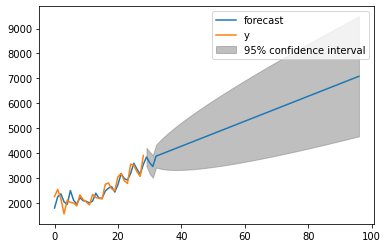

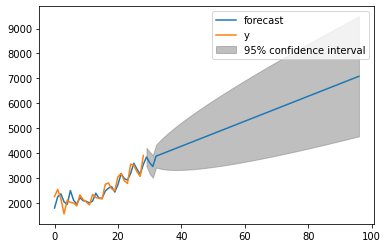

In [81]:
forecast=model_fit.forecast(steps=12)[0]
model_fit.plot_predict(1,97)

In [82]:
forecast

array([3835.82488637, 3606.16166371, 3453.27672159, 3868.69851334,
       3918.90147253, 3969.10443172, 4019.30739091, 4069.5103501 ,
       4119.71330929, 4169.91626848, 4220.11922767, 4270.32218686])

**SARIMAX MODEL**

In [87]:
ts = data['Sales']
ts.tail()

Quarter
Q2_95    4936.0
Q3_95    4895.0
Q4_95    4333.0
Q1_96    4194.0
Q2_96    5253.0
Name: Sales, dtype: float64

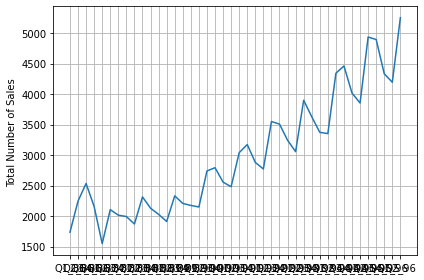

In [88]:
import matplotlib.pylab as plt
plt.plot(ts)
plt.ylabel('Total Number of Sales ')
plt.grid()
plt.tight_layout()
plt.savefig('Sales.png')
plt.show()

In [89]:
from statsmodels.tsa.stattools import adfuller

def Sales(timeseries):
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    alpha = 1e-3
    pvalue = dftest[1]
    if pvalue < alpha and test_statistic < critical_value:  # null hypothesis: x is non Sales
        print("X is Sales")
        return True
    else:
        print("X is not Sales")
        return False

In [90]:
ts_diff = pd.Series(ts)
d = 0
while Sales(ts_diff) is False:
    ts_diff = ts_diff.diff().dropna()
    d = d + 1

X is not Sales
X is not Sales
X is Sales


**SARIMA model**

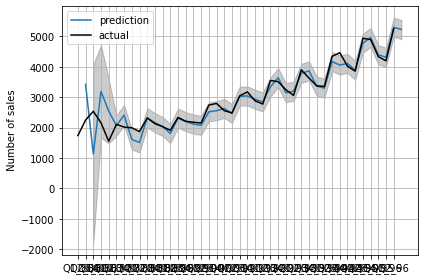

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = 9
q = 1
model = SARIMAX(ts, order=(p,d,q))
model_fit = model.fit(disp=1,solver='powell')
    
fcast = model_fit.get_prediction(start=1, end=len(ts))
ts_p = fcast.predicted_mean
ts_ci = fcast.conf_int()


plt.show()
plt.plot(ts_p,label='prediction')
plt.plot(ts,color='black',label='actual')
plt.fill_between(ts_ci.index[1:],
                ts_ci.iloc[1:, 0],
                ts_ci.iloc[1:, 1], color='k', alpha=.2)

plt.ylabel(' Number of sales')
plt.legend()
plt.tight_layout()
plt.grid()
plt.savefig('Sales 1.png')
plt.show()

In [92]:
#Calculate some statistics
from scipy import stats
stats.pearsonr(ts_p[1:], ts[1:])

(0.9066358213154487, 3.370247744487896e-16)

In [93]:
residuals = ts - ts_p
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ts-np.mean(ts))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

1.0